# Exploratory Data Analysis - Cleaning and Manipulation

# # Sheet 1 - Data Cleaning and EDA


importing basic libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


In [2]:
cd D:\Bepec\Project 2 - Food Service

D:\Bepec\Project 2 - Food Service


In [3]:
#Importing excel file
df = pd.read_excel('Food_services.docx-EmbeddedFile.xlsx')

In [4]:
df.head(3)

,NAME,CITY,STATE,ZIP,ZIP_PLUS4,COUNTY_CODE,COUNTY_NAME,MSA,MARKET_SEGMENT,SIMPLIFIED_MENU,...,AVERAGE_CHECK,NUMBER_OF_ROOMS,FOOD_BEVERAGE_PURCHASE,FOOD_PURCHASE,BEVERAGE_PURCHASE,TOTAL_CATEGORY_DRY,TOTAL_CATEGORY_FRESH,TOTAL_CATEGORY_FROZEN,TOTAL_CATEGORY_PROTEIN,% Share of F&B Purchases from Company
0,APPLEBEE'S,POTTSTOWN,PA,19464,NaN,42091.0,MONTGOMERY,6162.0,"FSR - TRADITIONAL RESTAURANTS, CASUAL DINING",CLASSIC & VARIED MENU,...,$10 TO $15,NOT APPLICABLE,597290.100988,545006.687015,52283.413973,73292.586865,96286.339607,124412.626443,212623.779075,0.578681
1,STANS RESTAURANT,SAN LEANDRO,CA,94577,3236.0,6001.0,ALAMEDA,7362.0,"FSR - TRADITIONAL RESTAURANTS, CASUAL DINING",CLASSIC & VARIED MENU,...,$15 TO $20,NOT APPLICABLE,39742.939174,36264.065946,3478.873227,4876.797417,6406.773077,8278.261162,14147.721358,0.339348
2,THANH THANH,OAKLAND,CA,94606,2978.0,6001.0,ALAMEDA,7362.0,"FSR - TRADITIONAL RESTAURANTS, CASUAL DINING",CLASSIC & VARIED MENU,...,$15 TO $20,NOT APPLICABLE,39742.939174,36264.065946,3478.873227,4876.797417,6406.773077,8278.261162,14147.721358,0.646409


In [5]:
#removing non-required column
del df['ZIP_PLUS4']
del df['MSA']
del df['MARKET_SEGMENT']
del df['MENU_TYPE']
del df['NUMBER_OF_ROOMS']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   NAME                                   1000 non-null   object 
 1   CITY                                   1000 non-null   object 
 2   STATE                                  1000 non-null   object 
 3   ZIP                                    1000 non-null   int64  
 4   COUNTY_CODE                            999 non-null    float64
 5   COUNTY_NAME                            999 non-null    object 
 6   SIMPLIFIED_MENU                        1000 non-null   object 
 7   UNITS                                  1000 non-null   object 
 8   EMPLOYEES                              1000 non-null   object 
 9   YEARS_IN_BUSINESS                      1000 non-null   object 
 10  ANNUAL_SALES                           1000 non-null   object 
 11  AVERA

In [7]:
df.isnull().sum()

NAME                                       0
CITY                                       0
STATE                                      0
ZIP                                        0
COUNTY_CODE                                1
COUNTY_NAME                                1
SIMPLIFIED_MENU                            0
UNITS                                      0
EMPLOYEES                                  0
YEARS_IN_BUSINESS                          0
ANNUAL_SALES                               0
AVERAGE_CHECK                              0
FOOD_BEVERAGE_PURCHASE                   111
FOOD_PURCHASE                            111
BEVERAGE_PURCHASE                        111
TOTAL_CATEGORY_DRY                       111
TOTAL_CATEGORY_FRESH                     111
TOTAL_CATEGORY_FROZEN                    111
TOTAL_CATEGORY_PROTEIN                   111
% Share of F&B Purchases from Company    111
dtype: int64

In [8]:
#Row with null county code and county name
#Doesnot required deletion
df[df['COUNTY_CODE'].isnull()]

,NAME,CITY,STATE,ZIP,COUNTY_CODE,COUNTY_NAME,SIMPLIFIED_MENU,UNITS,EMPLOYEES,YEARS_IN_BUSINESS,ANNUAL_SALES,AVERAGE_CHECK,FOOD_BEVERAGE_PURCHASE,FOOD_PURCHASE,BEVERAGE_PURCHASE,TOTAL_CATEGORY_DRY,TOTAL_CATEGORY_FRESH,TOTAL_CATEGORY_FROZEN,TOTAL_CATEGORY_PROTEIN,% Share of F&B Purchases from Company
635,UNCLE BEAR'S GRILL AND BAR,HIGLEY,AZ,85236,NaN,NaN,AMERICAN AND AMERICAN TRADITIONAL,INDEPENDENT (1-9 UNITS),5 TO 9,5 YEARS PLUS,"<=$500,000",$15 TO $20,86932.085323,78865.921533,8066.16379,12288.523897,13162.115643,16345.872229,29061.485424,0.375721


In [9]:
#Rows containing null values in financial transactions need to be removed 
#as they cannot be replaced by any statistical value
df['FOOD_BEVERAGE_PURCHASE'] = df['FOOD_BEVERAGE_PURCHASE'].dropna(axis  = 0)
df['FOOD_PURCHASE'] = df['FOOD_PURCHASE'].dropna(axis  = 0)
df['BEVERAGE_PURCHASE'] = df['BEVERAGE_PURCHASE'].dropna(axis  = 0)
df['TOTAL_CATEGORY_DRY'] = df['TOTAL_CATEGORY_DRY'].dropna(axis  = 0)
df['TOTAL_CATEGORY_FRESH'] = df['TOTAL_CATEGORY_FRESH'].dropna(axis  = 0)
df['TOTAL_CATEGORY_FROZEN'] = df['TOTAL_CATEGORY_FROZEN'].dropna(axis  = 0)
df['TOTAL_CATEGORY_PROTEIN'] = df['TOTAL_CATEGORY_PROTEIN'].dropna(axis  = 0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   NAME                                   1000 non-null   object 
 1   CITY                                   1000 non-null   object 
 2   STATE                                  1000 non-null   object 
 3   ZIP                                    1000 non-null   int64  
 4   COUNTY_CODE                            999 non-null    float64
 5   COUNTY_NAME                            999 non-null    object 
 6   SIMPLIFIED_MENU                        1000 non-null   object 
 7   UNITS                                  1000 non-null   object 
 8   EMPLOYEES                              1000 non-null   object 
 9   YEARS_IN_BUSINESS                      1000 non-null   object 
 10  ANNUAL_SALES                           1000 non-null   object 
 11  AVERA

In [11]:
df.isna().sum()

NAME                                       0
CITY                                       0
STATE                                      0
ZIP                                        0
COUNTY_CODE                                1
COUNTY_NAME                                1
SIMPLIFIED_MENU                            0
UNITS                                      0
EMPLOYEES                                  0
YEARS_IN_BUSINESS                          0
ANNUAL_SALES                               0
AVERAGE_CHECK                              0
FOOD_BEVERAGE_PURCHASE                   111
FOOD_PURCHASE                            111
BEVERAGE_PURCHASE                        111
TOTAL_CATEGORY_DRY                       111
TOTAL_CATEGORY_FRESH                     111
TOTAL_CATEGORY_FROZEN                    111
TOTAL_CATEGORY_PROTEIN                   111
% Share of F&B Purchases from Company    111
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.shape

(888, 20)

In [14]:
df.tail()

,NAME,CITY,STATE,ZIP,COUNTY_CODE,COUNTY_NAME,SIMPLIFIED_MENU,UNITS,EMPLOYEES,YEARS_IN_BUSINESS,ANNUAL_SALES,AVERAGE_CHECK,FOOD_BEVERAGE_PURCHASE,FOOD_PURCHASE,BEVERAGE_PURCHASE,TOTAL_CATEGORY_DRY,TOTAL_CATEGORY_FRESH,TOTAL_CATEGORY_FROZEN,TOTAL_CATEGORY_PROTEIN,% Share of F&B Purchases from Company
995,SUBWAY,CARROLLTON,TX,75010,48121.0,DENTON,"SANDWICHES, SOUPS AND SALADS, DELI, SUBS & HOT...",501+ UNITS,1 TO 4,5 YEARS PLUS,"<=$500,000",$5 TO $7,1.264464e+05,1.082253e+05,18221.074108,20302.620653,19035.592321,27723.786598,26652.845984,0.987625
996,RED LOBSTER,INGLEWOOD,CA,90303,6037.0,LOS ANGELES,"STEAK, SEAFOOD & FISH",501+ UNITS,OVER 50,5 YEARS PLUS,"$2,500,001 - $5,000,000",$10 TO $15,1.096238e+06,1.026739e+06,69498.776116,142453.292480,191473.607862,182514.281291,440158.915398,0.599890
997,REYNOLDS CAFE,NAUGATUCK,CT,6770,9009.0,NEW HAVEN,CLASSIC & VARIED MENU,INDEPENDENT (1-9 UNITS),1 TO 4,5 YEARS PLUS,"<=$500,000",$15 TO $20,4.240708e+04,3.843948e+04,3967.601528,5235.276904,6858.790982,9732.188501,13174.927943,0.302793
998,PUEBLO VIEJO,PORT SAINT LUCIE,FL,34952,12111.0,SAINT LUCIE,CLASSIC & VARIED MENU,INDEPENDENT (1-9 UNITS),5 TO 9,5 YEARS PLUS,"<=$500,000",$15 TO $20,8.948728e+04,8.165407e+04,7833.212973,10980.852218,14425.825462,18639.765949,31855.749617,0.497217
999,BUFFALO WILD WINGS,DEARBORN,MI,48124,26163.0,WAYNE,"BAR & GRILL, BREW PUB, & EATERTAINMENT",501+ UNITS,10 TO 19,5 YEARS PLUS,"$1,000,001 - $2,500,000",$10 TO $15,5.653861e+05,5.257160e+05,39670.082460,73253.221050,91863.877018,114742.390183,199189.990762,0.666672


In [15]:
df.UNITS.unique()

array(['501+ UNITS', 'INDEPENDENT (1-9 UNITS)', '251-500 UNITS',
       '101-250 UNITS', '51-100 UNITS', '10-50 UNITS'], dtype=object)

In [16]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [17]:
#let us perform label encoding to the above UNITS column so as to include in our EDA
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
#array(['501+ UNITS' = 3, 'INDEPENDENT (1-9 UNITS)' = 5, '251-500 UNITS' = 2,
 #      '101-250 UNITS' = 1, '51-100 UNITS' = 4, '10-50 UNITS' = 0], dtype=object)
df['UNITS']= le.fit_transform(df['UNITS'])

In [19]:
df.UNITS.unique()

array([3, 5, 2, 1, 4, 0])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   NAME                                   888 non-null    object 
 1   CITY                                   888 non-null    object 
 2   STATE                                  888 non-null    object 
 3   ZIP                                    888 non-null    int64  
 4   COUNTY_CODE                            888 non-null    float64
 5   COUNTY_NAME                            888 non-null    object 
 6   SIMPLIFIED_MENU                        888 non-null    object 
 7   UNITS                                  888 non-null    int32  
 8   EMPLOYEES                              888 non-null    object 
 9   YEARS_IN_BUSINESS                      888 non-null    object 
 10  ANNUAL_SALES                           888 non-null    object 
 11  AVERAG

In [21]:
df.tail()

,NAME,CITY,STATE,ZIP,COUNTY_CODE,COUNTY_NAME,SIMPLIFIED_MENU,UNITS,EMPLOYEES,YEARS_IN_BUSINESS,ANNUAL_SALES,AVERAGE_CHECK,FOOD_BEVERAGE_PURCHASE,FOOD_PURCHASE,BEVERAGE_PURCHASE,TOTAL_CATEGORY_DRY,TOTAL_CATEGORY_FRESH,TOTAL_CATEGORY_FROZEN,TOTAL_CATEGORY_PROTEIN,% Share of F&B Purchases from Company
995,SUBWAY,CARROLLTON,TX,75010,48121.0,DENTON,"SANDWICHES, SOUPS AND SALADS, DELI, SUBS & HOT...",3,1 TO 4,5 YEARS PLUS,"<=$500,000",$5 TO $7,1.264464e+05,1.082253e+05,18221.074108,20302.620653,19035.592321,27723.786598,26652.845984,0.987625
996,RED LOBSTER,INGLEWOOD,CA,90303,6037.0,LOS ANGELES,"STEAK, SEAFOOD & FISH",3,OVER 50,5 YEARS PLUS,"$2,500,001 - $5,000,000",$10 TO $15,1.096238e+06,1.026739e+06,69498.776116,142453.292480,191473.607862,182514.281291,440158.915398,0.599890
997,REYNOLDS CAFE,NAUGATUCK,CT,6770,9009.0,NEW HAVEN,CLASSIC & VARIED MENU,5,1 TO 4,5 YEARS PLUS,"<=$500,000",$15 TO $20,4.240708e+04,3.843948e+04,3967.601528,5235.276904,6858.790982,9732.188501,13174.927943,0.302793
998,PUEBLO VIEJO,PORT SAINT LUCIE,FL,34952,12111.0,SAINT LUCIE,CLASSIC & VARIED MENU,5,5 TO 9,5 YEARS PLUS,"<=$500,000",$15 TO $20,8.948728e+04,8.165407e+04,7833.212973,10980.852218,14425.825462,18639.765949,31855.749617,0.497217
999,BUFFALO WILD WINGS,DEARBORN,MI,48124,26163.0,WAYNE,"BAR & GRILL, BREW PUB, & EATERTAINMENT",3,10 TO 19,5 YEARS PLUS,"$1,000,001 - $2,500,000",$10 TO $15,5.653861e+05,5.257160e+05,39670.082460,73253.221050,91863.877018,114742.390183,199189.990762,0.666672


In [22]:
#Ckecking all uniques from menu styles
df.SIMPLIFIED_MENU.unique()

array(['CLASSIC & VARIED MENU', 'PIZZA, PASTA & ITALIAN', 'OTHER ASIAN',
       'SANDWICHES, SOUPS AND SALADS, DELI, SUBS & HOT DOG', 'CHICKEN',
       'BEVERAGES', 'OTHER ETHNIC FOOD', 'MEXICAN', 'CHINESE',
       'FROZEN DESSERT', 'LATIN AMERICAN',
       'BAKERIES, BAGELS, DONUTS AND COFFEE & SNACKS',
       'AMERICAN AND AMERICAN TRADITIONAL', 'HAMBURGERS',
       'STEAK, SEAFOOD & FISH', 'EUROPEAN',
       'BAR & GRILL, BREW PUB, & EATERTAINMENT', 'BBQ',
       'AMERICAN REGIONAL'], dtype=object)

In [23]:
#As we can see the Employee columns have a Unknown Value in unique
#as the (Over 50) means employee more than 50, we cannot assume
df.EMPLOYEES.unique()

array(['OVER 50', '1 TO 4', '20 TO 49', '10 TO 19', '5 TO 9', 'UNKNOWN'],
      dtype=object)

In [24]:
#The UNKNOWN employee rows have 5LabelEncoding as UNITS, therefore conting the ones whose units = 5,
df[df.UNITS == 5]

,NAME,CITY,STATE,ZIP,COUNTY_CODE,COUNTY_NAME,SIMPLIFIED_MENU,UNITS,EMPLOYEES,YEARS_IN_BUSINESS,ANNUAL_SALES,AVERAGE_CHECK,FOOD_BEVERAGE_PURCHASE,FOOD_PURCHASE,BEVERAGE_PURCHASE,TOTAL_CATEGORY_DRY,TOTAL_CATEGORY_FRESH,TOTAL_CATEGORY_FROZEN,TOTAL_CATEGORY_PROTEIN,% Share of F&B Purchases from Company
1,STANS RESTAURANT,SAN LEANDRO,CA,94577,6001.0,ALAMEDA,CLASSIC & VARIED MENU,5,1 TO 4,5 YEARS PLUS,"<=$500,000",$15 TO $20,39742.939174,36264.065946,3478.873227,4876.797417,6406.773077,8278.261162,14147.721358,0.339348
2,THANH THANH,OAKLAND,CA,94606,6001.0,ALAMEDA,CLASSIC & VARIED MENU,5,1 TO 4,5 YEARS PLUS,"<=$500,000",$15 TO $20,39742.939174,36264.065946,3478.873227,4876.797417,6406.773077,8278.261162,14147.721358,0.646409
4,NINNA RESTAURANT,OAKLAND,CA,94611,6001.0,ALAMEDA,OTHER ASIAN,5,1 TO 4,5 YEARS PLUS,"<=$500,000",$15 TO $20,42645.370261,40042.762870,2602.607391,6395.821567,8260.449546,5938.274331,15827.198446,0.655083
5,BROOKLYN DISCOUNT DELI,BERKELEY,CA,94704,6001.0,ALAMEDA,"SANDWICHES, SOUPS AND SALADS, DELI, SUBS & HOT...",5,1 TO 4,5 YEARS PLUS,"<=$500,000",$7 TO $10,46966.770000,41868.111834,5098.658166,5571.577184,6591.308817,9054.428704,16690.100352,0.780505
9,THE STEAM DONKEY RESTAURANT,PINECREST,CA,95364,6109.0,TUOLUMNE,CLASSIC & VARIED MENU,5,5 TO 9,5 YEARS PLUS,"<=$500,000",$15 TO $20,113584.013152,103641.507876,9942.505276,13937.726637,18310.346758,23658.998157,40433.722372,0.414229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,JAX 5TH AVE DELI & ALE HOUSE,LAKE MARY,FL,32746,12117.0,SEMINOLE,"SANDWICHES, SOUPS AND SALADS, DELI, SUBS & HOT...",5,20 TO 49,5 YEARS PLUS,"$1,000,001 - $2,500,000",$7 TO $10,351085.824900,308621.721131,42464.103769,48261.377066,49406.061602,64471.587114,112326.785796,0.253210
992,SUSHI PLACE,BIDDEFORD,ME,4005,23031.0,YORK,OTHER ASIAN,5,1 TO 4,5 YEARS PLUS,"<=$500,000",$15 TO $20,36772.724431,34528.519168,2244.205264,5515.060194,7122.912358,5120.521272,13647.652803,0.687224
993,SUSHIYA,KENNEWICK,WA,99336,53005.0,BENTON,OTHER ASIAN,5,5 TO 9,5 YEARS PLUS,"<=$500,000",$20 TO $30,99692.915010,93608.748877,6084.166133,14951.637000,19310.614248,13882.019891,36999.550944,0.961065
997,REYNOLDS CAFE,NAUGATUCK,CT,6770,9009.0,NEW HAVEN,CLASSIC & VARIED MENU,5,1 TO 4,5 YEARS PLUS,"<=$500,000",$15 TO $20,42407.077315,38439.475788,3967.601528,5235.276904,6858.790982,9732.188501,13174.927943,0.302793


In [25]:
# givinng variable name un5 to Units = 5 , datafield
un5 = df[df.UNITS == 5]

In [26]:
#here we can easily see that 5TO9 was the top count for UNITs = 5(1-9Units)
un5['EMPLOYEES'].value_counts()

5 TO 9      198
10 TO 19    165
1 TO 4      128
20 TO 49     35
OVER 50      16
UNKNOWN       3
Name: EMPLOYEES, dtype: int64

In [27]:
#As we can see from above code 5 TO 9 counts is the max used 
# therefore replacing UNKNOWN with (5 to 9)
# 
df.EMPLOYEES = df.EMPLOYEES.replace('UNKNOWN', '5 TO 9')

In [28]:
#Now check the value replaced with 5 TO 9 :
df.EMPLOYEES.unique()
#Correctly changed unknown values

array(['OVER 50', '1 TO 4', '20 TO 49', '10 TO 19', '5 TO 9'],
      dtype=object)

In [29]:
#Again performing Label encoding to the no of Employee columns
df.EMPLOYEES = le.fit_transform(df['EMPLOYEES'])

In [30]:
#checking label encoding

#'OVER 50' = 4, '1 TO 4' = 0, '20 TO 49' = 2, '10 TO 19' = 1, '5 TO 9' = 3

df.EMPLOYEES.unique()

array([4, 0, 2, 1, 3])

In [31]:
df.head(8)

,NAME,CITY,STATE,ZIP,COUNTY_CODE,COUNTY_NAME,SIMPLIFIED_MENU,UNITS,EMPLOYEES,YEARS_IN_BUSINESS,ANNUAL_SALES,AVERAGE_CHECK,FOOD_BEVERAGE_PURCHASE,FOOD_PURCHASE,BEVERAGE_PURCHASE,TOTAL_CATEGORY_DRY,TOTAL_CATEGORY_FRESH,TOTAL_CATEGORY_FROZEN,TOTAL_CATEGORY_PROTEIN,% Share of F&B Purchases from Company
0,APPLEBEE'S,POTTSTOWN,PA,19464,42091.0,MONTGOMERY,CLASSIC & VARIED MENU,3,4,5 YEARS PLUS,"$1,000,001 - $2,500,000",$10 TO $15,597290.100988,545006.687015,52283.413973,73292.586865,96286.339607,124412.626443,212623.779075,0.578681
1,STANS RESTAURANT,SAN LEANDRO,CA,94577,6001.0,ALAMEDA,CLASSIC & VARIED MENU,5,0,5 YEARS PLUS,"<=$500,000",$15 TO $20,39742.939174,36264.065946,3478.873227,4876.797417,6406.773077,8278.261162,14147.721358,0.339348
2,THANH THANH,OAKLAND,CA,94606,6001.0,ALAMEDA,CLASSIC & VARIED MENU,5,0,5 YEARS PLUS,"<=$500,000",$15 TO $20,39742.939174,36264.065946,3478.873227,4876.797417,6406.773077,8278.261162,14147.721358,0.646409
3,DOMINO'S PIZZA,WENDELL,NC,27591,37183.0,WAKE,"PIZZA, PASTA & ITALIAN",3,2,5 YEARS PLUS,"$500,001 - $1,000,000",$7 TO $10,282606.140700,231329.707646,51276.433054,49474.097973,27035.026215,58876.279313,53078.768135,0.797020
4,NINNA RESTAURANT,OAKLAND,CA,94611,6001.0,ALAMEDA,OTHER ASIAN,5,0,5 YEARS PLUS,"<=$500,000",$15 TO $20,42645.370261,40042.762870,2602.607391,6395.821567,8260.449546,5938.274331,15827.198446,0.655083
5,BROOKLYN DISCOUNT DELI,BERKELEY,CA,94704,6001.0,ALAMEDA,"SANDWICHES, SOUPS AND SALADS, DELI, SUBS & HOT...",5,0,5 YEARS PLUS,"<=$500,000",$7 TO $10,46966.770000,41868.111834,5098.658166,5571.577184,6591.308817,9054.428704,16690.100352,0.780505
6,BOJANGLES' FAMOUS CHICKEN 'N BISCUITS,RALEIGH,NC,27604,37183.0,WAKE,CHICKEN,3,4,5 YEARS PLUS,"$1,000,001 - $2,500,000",$5 TO $7,564695.533800,467485.441404,97210.092396,93793.217443,51253.124286,111617.915112,129556.508612,0.135044
7,STARBUCKS,SAN RAFAEL,CA,94901,6041.0,MARIN,BEVERAGES,3,1,5 YEARS PLUS,"$500,001 - $1,000,000",UNDER $5,194680.105200,136081.393535,58598.711665,52563.628404,25113.733571,23361.612624,0.000000,0.980680


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   NAME                                   888 non-null    object 
 1   CITY                                   888 non-null    object 
 2   STATE                                  888 non-null    object 
 3   ZIP                                    888 non-null    int64  
 4   COUNTY_CODE                            888 non-null    float64
 5   COUNTY_NAME                            888 non-null    object 
 6   SIMPLIFIED_MENU                        888 non-null    object 
 7   UNITS                                  888 non-null    int32  
 8   EMPLOYEES                              888 non-null    int32  
 9   YEARS_IN_BUSINESS                      888 non-null    object 
 10  ANNUAL_SALES                           888 non-null    object 
 11  AVERAG

In [33]:
df.YEARS_IN_BUSINESS.unique()

array(['5 YEARS PLUS', '2 TO 5 YEARS'], dtype=object)

In [34]:
#Label encoding the Year in businees column
# 2 to 5 = 0
# 5 yr plus = 1
df.YEARS_IN_BUSINESS = le.fit_transform(df.YEARS_IN_BUSINESS)

In [35]:
df.ANNUAL_SALES.unique()

array(['$1,000,001 - $2,500,000', '<=$500,000', '$500,001 - $1,000,000',
       '$2,500,001 - $5,000,000', '>$5,000,000'], dtype=object)

In [36]:
# Replacing annual sales value to numeric type values rather than chosing LabelEncoding, i replaced value self for better
# understanding

In [37]:
df.ANNUAL_SALES = df.ANNUAL_SALES.replace('<=$500,000', 0)
df.ANNUAL_SALES = df.ANNUAL_SALES.replace('$500,001 - $1,000,000', 1)
df.ANNUAL_SALES = df.ANNUAL_SALES.replace('$1,000,001 - $2,500,000', 2)
df.ANNUAL_SALES = df.ANNUAL_SALES.replace('$2,500,001 - $5,000,000', 3)
df.ANNUAL_SALES = df.ANNUAL_SALES.replace('>$5,000,000', 4)


In [38]:
df.ANNUAL_SALES.unique()

array([2, 0, 1, 3, 4], dtype=int64)

In [39]:
df.AVERAGE_CHECK.unique()

array(['$10 TO $15', '$15 TO $20', '$7 TO $10', '$5 TO $7', 'UNDER $5',
       '$30 TO $50', '$50 TO $75', '$20 TO $30', 'UNCODED'], dtype=object)

In [40]:
df[df.AVERAGE_CHECK == 'UNCODED']

,NAME,CITY,STATE,ZIP,COUNTY_CODE,COUNTY_NAME,SIMPLIFIED_MENU,UNITS,EMPLOYEES,YEARS_IN_BUSINESS,ANNUAL_SALES,AVERAGE_CHECK,FOOD_BEVERAGE_PURCHASE,FOOD_PURCHASE,BEVERAGE_PURCHASE,TOTAL_CATEGORY_DRY,TOTAL_CATEGORY_FRESH,TOTAL_CATEGORY_FROZEN,TOTAL_CATEGORY_PROTEIN,% Share of F&B Purchases from Company
769,BIG POPY'S DELI,BAKERSFIELD,CA,93301,6029.0,KERN,"SANDWICHES, SOUPS AND SALADS, DELI, SUBS & HOT...",5,3,0,0,UNCODED,112069.9116,99903.731769,12166.179831,13294.63709,15727.873057,21605.254617,39825.137456,0.584849


In [41]:
df.AVERAGE_CHECK.value_counts()

$15 TO $20    246
$7 TO $10     228
$5 TO $7      188
$10 TO $15    113
UNDER $5       58
$30 TO $50     37
$20 TO $30      9
$50 TO $75      8
UNCODED         1
Name: AVERAGE_CHECK, dtype: int64

In [42]:
# replaced UNCODED withh null and deleting the null row
df.AVERAGE_CHECK = df.AVERAGE_CHECK.replace("UNCODED", np.nan)
df = df.dropna()

In [43]:
# Label encoding the average_check column for better anlysis
# ['$10 TO $15' = 0, '$15 TO $20' = 1, '$7 TO $10' = 6, '$5 TO $7' = 4, 'UNDER $5' = 7,
#       '$30 TO $50' = 3, '$50 TO $75' = 5, '$20 TO $30' = 2
#[0, 1, 6, 4, 7, 3, 5, 2]
df.AVERAGE_CHECK = le.fit_transform(df.AVERAGE_CHECK)

In [44]:
df.AVERAGE_CHECK.unique()

array([0, 1, 6, 4, 7, 3, 5, 2])

In [45]:
df.head(3)

,NAME,CITY,STATE,ZIP,COUNTY_CODE,COUNTY_NAME,SIMPLIFIED_MENU,UNITS,EMPLOYEES,YEARS_IN_BUSINESS,ANNUAL_SALES,AVERAGE_CHECK,FOOD_BEVERAGE_PURCHASE,FOOD_PURCHASE,BEVERAGE_PURCHASE,TOTAL_CATEGORY_DRY,TOTAL_CATEGORY_FRESH,TOTAL_CATEGORY_FROZEN,TOTAL_CATEGORY_PROTEIN,% Share of F&B Purchases from Company
0,APPLEBEE'S,POTTSTOWN,PA,19464,42091.0,MONTGOMERY,CLASSIC & VARIED MENU,3,4,1,2,0,597290.100988,545006.687015,52283.413973,73292.586865,96286.339607,124412.626443,212623.779075,0.578681
1,STANS RESTAURANT,SAN LEANDRO,CA,94577,6001.0,ALAMEDA,CLASSIC & VARIED MENU,5,0,1,0,1,39742.939174,36264.065946,3478.873227,4876.797417,6406.773077,8278.261162,14147.721358,0.339348
2,THANH THANH,OAKLAND,CA,94606,6001.0,ALAMEDA,CLASSIC & VARIED MENU,5,0,1,0,1,39742.939174,36264.065946,3478.873227,4876.797417,6406.773077,8278.261162,14147.721358,0.646409


AS all the Data Manipulation as well as Data cleaning operation can be seen in the above code,

Those data which were converted to (numeric format) using LabelEncoding can now be easily used for statistical analysis

# Statistical Findings and Visualizations

In [46]:
df.corr()

,ZIP,COUNTY_CODE,UNITS,EMPLOYEES,YEARS_IN_BUSINESS,ANNUAL_SALES,AVERAGE_CHECK,FOOD_BEVERAGE_PURCHASE,FOOD_PURCHASE,BEVERAGE_PURCHASE,TOTAL_CATEGORY_DRY,TOTAL_CATEGORY_FRESH,TOTAL_CATEGORY_FROZEN,TOTAL_CATEGORY_PROTEIN,% Share of F&B Purchases from Company
ZIP,1.000000,-0.303150,-0.076666,-0.031542,-0.016020,-0.066572,0.050953,-0.072966,-0.077532,-0.023002,-0.037919,-0.073601,-0.083137,-0.091194,-0.021541
COUNTY_CODE,-0.303150,1.000000,-0.039563,0.019461,0.015347,0.018505,0.086598,0.018571,0.013094,0.055438,0.021669,-0.011120,0.030666,0.002014,0.005597
UNITS,-0.076666,-0.039563,1.000000,-0.064946,-0.030253,-0.438213,-0.316334,-0.415346,-0.384698,-0.553977,-0.498337,-0.295014,-0.451845,-0.268321,0.044164
EMPLOYEES,-0.031542,0.019461,-0.064946,1.000000,-0.030393,0.212981,-0.041573,0.321786,0.325441,0.224543,0.293675,0.328389,0.321689,0.320769,-0.015590
YEARS_IN_BUSINESS,-0.016020,0.015347,-0.030253,-0.030393,1.000000,0.031058,0.022424,0.024989,0.023667,0.029433,0.033968,0.019171,0.009571,0.023244,-0.018369
ANNUAL_SALES,-0.066572,0.018505,-0.438213,0.212981,0.031058,1.000000,0.012825,0.879085,0.871568,0.744158,0.873517,0.816357,0.861170,0.812402,0.025115
AVERAGE_CHECK,0.050953,0.086598,-0.316334,-0.041573,0.022424,0.012825,1.000000,-0.022805,-0.064293,0.292028,0.102112,-0.143345,-0.009571,-0.184247,0.006433
FOOD_BEVERAGE_PURCHASE,-0.072966,0.018571,-0.415346,0.321786,0.024989,0.879085,-0.022805,1.000000,0.996857,0.806123,0.966689,0.943782,0.974828,0.951959,0.007338
FOOD_PURCHASE,-0.077532,0.013094,-0.384698,0.325441,0.023667,0.871568,-0.064293,0.996857,1.000000,0.756706,0.947607,0.961717,0.968472,0.971848,0.009383
BEVERAGE_PURCHASE,-0.023002,0.055438,-0.553977,0.224543,0.029433,0.744158,0.292028,0.806123,0.756706,1.000000,0.899093,0.604691,0.810419,0.596498,-0.009533


<AxesSubplot:>

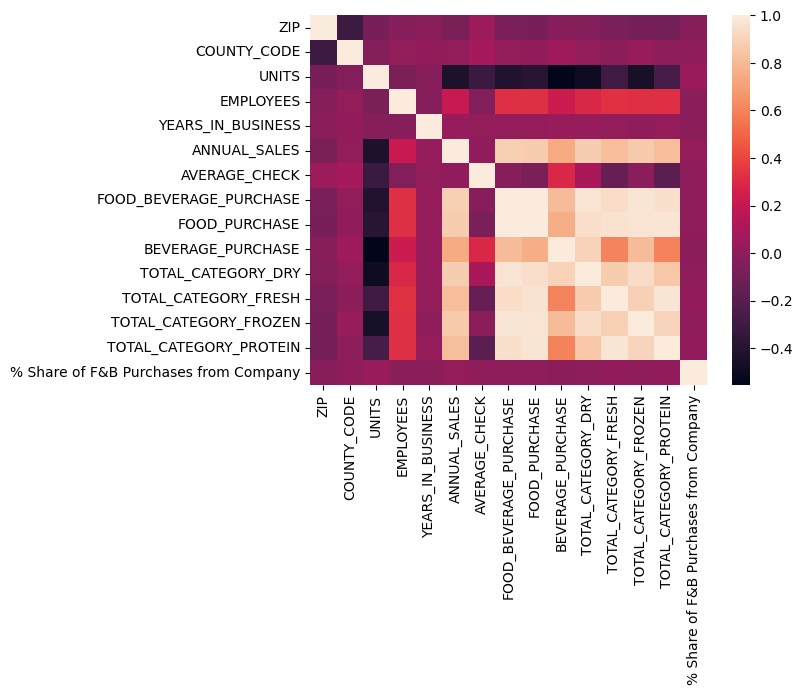

In [47]:
sns.heatmap(df.corr())

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   NAME                                   887 non-null    object 
 1   CITY                                   887 non-null    object 
 2   STATE                                  887 non-null    object 
 3   ZIP                                    887 non-null    int64  
 4   COUNTY_CODE                            887 non-null    float64
 5   COUNTY_NAME                            887 non-null    object 
 6   SIMPLIFIED_MENU                        887 non-null    object 
 7   UNITS                                  887 non-null    int32  
 8   EMPLOYEES                              887 non-null    int32  
 9   YEARS_IN_BUSINESS                      887 non-null    int32  
 10  ANNUAL_SALES                           887 non-null    int64  
 11  AVERAG

In [49]:
df.tail(3)

,NAME,CITY,STATE,ZIP,COUNTY_CODE,COUNTY_NAME,SIMPLIFIED_MENU,UNITS,EMPLOYEES,YEARS_IN_BUSINESS,ANNUAL_SALES,AVERAGE_CHECK,FOOD_BEVERAGE_PURCHASE,FOOD_PURCHASE,BEVERAGE_PURCHASE,TOTAL_CATEGORY_DRY,TOTAL_CATEGORY_FRESH,TOTAL_CATEGORY_FROZEN,TOTAL_CATEGORY_PROTEIN,% Share of F&B Purchases from Company
997,REYNOLDS CAFE,NAUGATUCK,CT,6770,9009.0,NEW HAVEN,CLASSIC & VARIED MENU,5,0,1,0,1,42407.077315,38439.475788,3967.601528,5235.276904,6858.790982,9732.188501,13174.927943,0.302793
998,PUEBLO VIEJO,PORT SAINT LUCIE,FL,34952,12111.0,SAINT LUCIE,CLASSIC & VARIED MENU,5,3,1,0,1,89487.281190,81654.068217,7833.212973,10980.852218,14425.825462,18639.765949,31855.749617,0.497217
999,BUFFALO WILD WINGS,DEARBORN,MI,48124,26163.0,WAYNE,"BAR & GRILL, BREW PUB, & EATERTAINMENT",3,1,1,2,0,565386.131138,525716.048679,39670.082460,73253.221050,91863.877018,114742.390183,199189.990762,0.666672


1 - Which City has most (restaurants) ?

Text(0.5, 0, 'City Name')

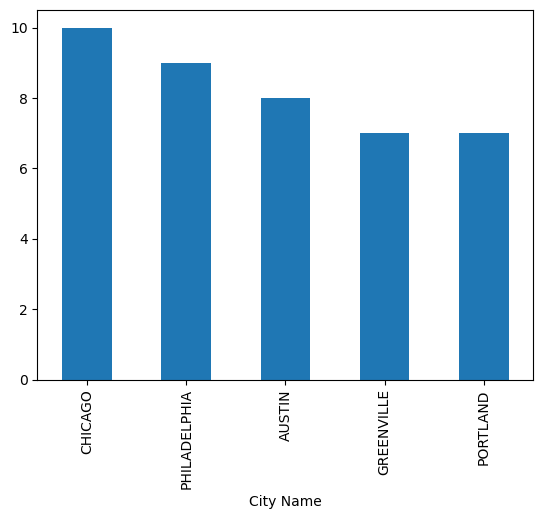

In [50]:
#Here we can see the most number of customers are from CHicago city and then PHILADELPHIA
df.CITY.value_counts().head().plot.bar()
plt.pyplot.xlabel('City Name')

2 - Which State has most customers(restaurants)

<AxesSubplot:ylabel='STATE'>

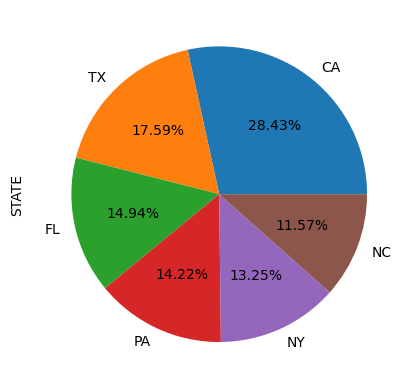

In [51]:
#Which State has most customers? - 1st CA , 2nd Texas
df.STATE.value_counts().head(6).plot.pie(autopct='%1.2f%%')

3 - What UNITS are most among the restaurants?

Text(0.5, 0, 'Units as LabelEncoded')

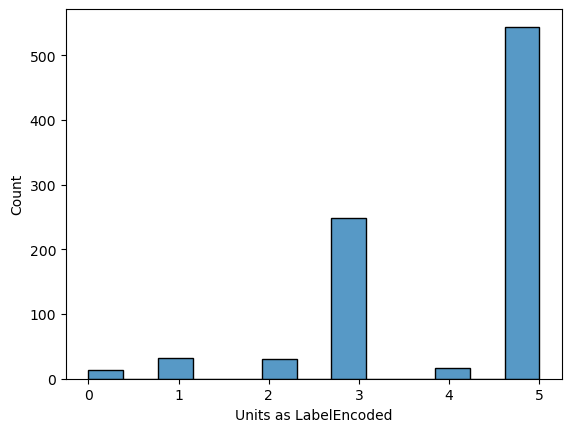

In [52]:
# we can see that most of the Restaurants have - INDEPENDENT Units (1-9) according to LabelEncoding Value = (5)
sns.histplot(x = df.UNITS)
plt.pyplot.xlabel('Units as LabelEncoded')

4 - Who performs better in Annual Sales with experience in business?

Text(0.5, 1.0, 'Business Years VS Sales')

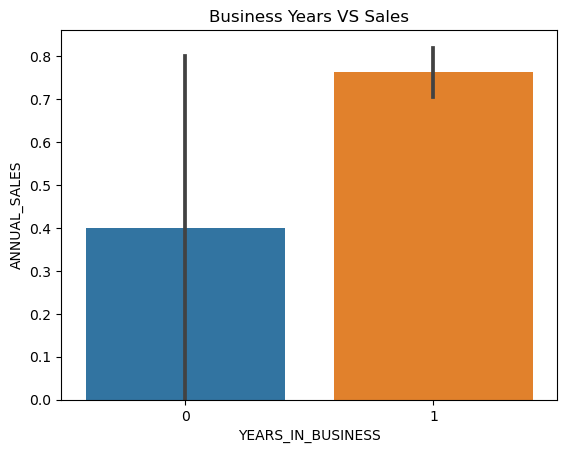

In [53]:
# Annual Sales LE = $1,000,001 - $2,500,000' = 0, '<=$500,000' = 3, '$500,001 - $1,000,000' = 2,
#  '$2,500,001 - $5,000,000' = 1, '>$5,000,000' = 4
# Business Year LE = (2 to 5 = 0, 5 yr plus = 1)

sns.barplot(data = df, x = df.YEARS_IN_BUSINESS, y = df.ANNUAL_SALES)
plt.pyplot.title('Business Years VS Sales')

As shown in the above bar plot, the restaurants which are in business since (2-5) years are having more number of annual sales, than those in business for more than 5 years

5 - Which Units have most F&B Purchases?

Text(0.5, 0, 'UNITS as LabelEncoding')

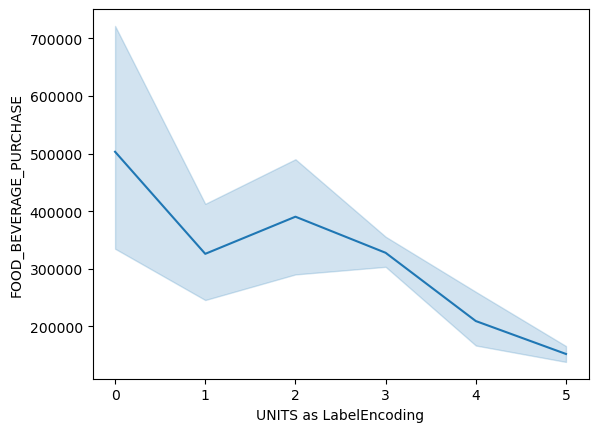

In [54]:
#501+ UNITS' = 3, 'INDEPENDENT (1-9 UNITS)' = 5, '251-500 UNITS' = 2,
#101-250 UNITS' = 1, '51-100 UNITS' = 4, '10-50 UNITS' = 0

sns.lineplot(x = df.UNITS, y = df.FOOD_BEVERAGE_PURCHASE)
plt.pyplot.xlabel('UNITS as LabelEncoding')

1- We can easily see the above line plot and determine, that those units - 0('10-50 UNITS') are having higher purchases
There was an increase in purchase by Units - 2(251-500 UNITS), and then purchase gradually decreases.


2 - Its shocking to see the Restaurants having units - 3(500+ units) are having lower purchases than (10-50 units)

In [55]:
df.head(2)

,NAME,CITY,STATE,ZIP,COUNTY_CODE,COUNTY_NAME,SIMPLIFIED_MENU,UNITS,EMPLOYEES,YEARS_IN_BUSINESS,ANNUAL_SALES,AVERAGE_CHECK,FOOD_BEVERAGE_PURCHASE,FOOD_PURCHASE,BEVERAGE_PURCHASE,TOTAL_CATEGORY_DRY,TOTAL_CATEGORY_FRESH,TOTAL_CATEGORY_FROZEN,TOTAL_CATEGORY_PROTEIN,% Share of F&B Purchases from Company
0,APPLEBEE'S,POTTSTOWN,PA,19464,42091.0,MONTGOMERY,CLASSIC & VARIED MENU,3,4,1,2,0,597290.100988,545006.687015,52283.413973,73292.586865,96286.339607,124412.626443,212623.779075,0.578681
1,STANS RESTAURANT,SAN LEANDRO,CA,94577,6001.0,ALAMEDA,CLASSIC & VARIED MENU,5,0,1,0,1,39742.939174,36264.065946,3478.873227,4876.797417,6406.773077,8278.261162,14147.721358,0.339348


6 - What % share of F&B purchases is the most for the companys's customer restaurants?

In [56]:
df["% Share of F&B Purchases from Company"].describe()

count    887.000000
mean       0.486774
std        0.288602
min        0.001300
25%        0.231484
50%        0.489578
75%        0.736600
max        0.999887
Name: % Share of F&B Purchases from Company, dtype: float64

<AxesSubplot:xlabel='% Share of F&B Purchases from Company', ylabel='Count'>

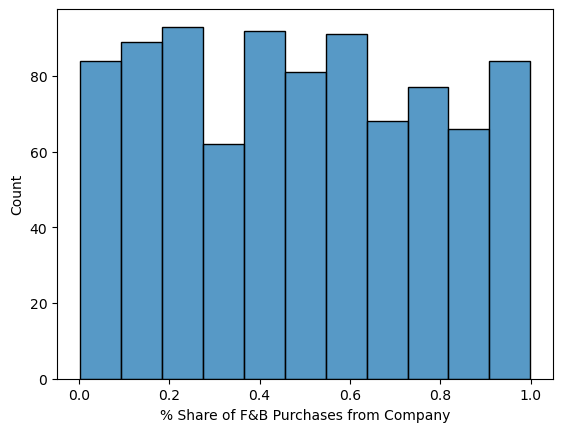

In [57]:
sns.histplot(df["% Share of F&B Purchases from Company"])

We can see that the most of the percent share lies between 0.2% - 0.6%, with average of 0.4%

7 - Which Menu Style restaurant have more no of annual sales ?

<AxesSubplot:xlabel='ANNUAL_SALES', ylabel='SIMPLIFIED_MENU'>

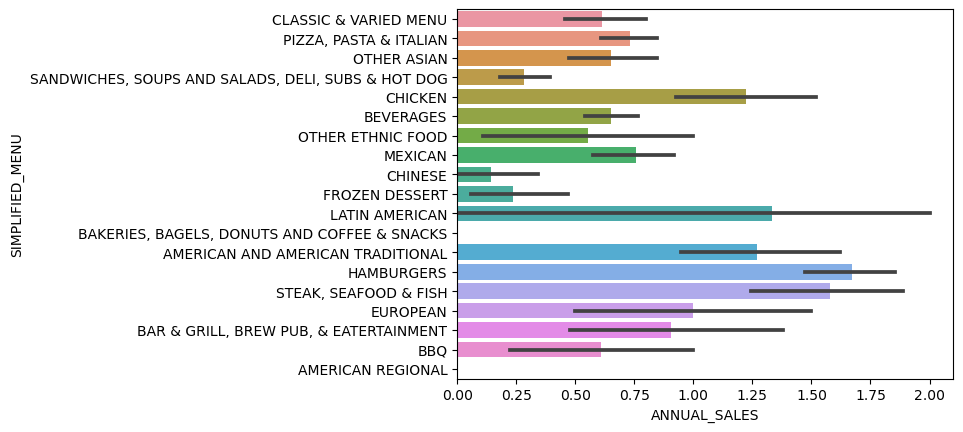

In [58]:
sns.barplot(x=df['ANNUAL_SALES'], y=df['SIMPLIFIED_MENU'])

As we can see from above chart : 1st Hamburgers

After that 2nd Steak, Seafood & Fish category restraunts have most Anuual sales

In [59]:
# Which restaurant has the most percent share of F&B purchases ?
df["% Share of F&B Purchases from Company"].max()

0.9998868678449319

In [60]:
df[df["% Share of F&B Purchases from Company"] == 0.9998868678449319]

,NAME,CITY,STATE,ZIP,COUNTY_CODE,COUNTY_NAME,SIMPLIFIED_MENU,UNITS,EMPLOYEES,YEARS_IN_BUSINESS,ANNUAL_SALES,AVERAGE_CHECK,FOOD_BEVERAGE_PURCHASE,FOOD_PURCHASE,BEVERAGE_PURCHASE,TOTAL_CATEGORY_DRY,TOTAL_CATEGORY_FRESH,TOTAL_CATEGORY_FROZEN,TOTAL_CATEGORY_PROTEIN,% Share of F&B Purchases from Company
45,CHINA BISTRO,DANVILLE,CA,94526,6013.0,CONTRA COSTA,CHINESE,5,0,1,0,1,28909.192282,27144.891092,1764.30119,4335.71181,5599.73856,4025.541657,10729.219148,0.999887


We can see that "China Bistro" has the most percent share of F&B purchases from Shauns Company.

In [61]:
chinese_res = df[df.SIMPLIFIED_MENU == "CHINESE"]

In [62]:
df[df.SIMPLIFIED_MENU == "CHINESE"].describe()

,ZIP,COUNTY_CODE,UNITS,EMPLOYEES,YEARS_IN_BUSINESS,ANNUAL_SALES,AVERAGE_CHECK,FOOD_BEVERAGE_PURCHASE,FOOD_PURCHASE,BEVERAGE_PURCHASE,TOTAL_CATEGORY_DRY,TOTAL_CATEGORY_FRESH,TOTAL_CATEGORY_FROZEN,TOTAL_CATEGORY_PROTEIN,% Share of F&B Purchases from Company
count,35.000000,35.000000,35.0,35.000000,35.0,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,44823.857143,24666.828571,5.0,1.314286,1.0,0.142857,1.228571,92444.130109,86099.775732,6344.354377,13715.143681,17071.767653,13775.322995,33566.416613,0.470383
std,30120.650118,15276.398008,0.0,1.388428,0.0,0.550019,1.352247,159630.879186,149933.860013,9782.917149,23901.511953,30988.781899,22317.659019,59307.050772,0.298421
min,1545.000000,6001.000000,5.0,0.000000,1.0,0.000000,0.000000,28730.967300,25151.269316,1764.301190,4068.404579,3299.547707,4025.541657,9469.079364,0.017676
25%,20799.500000,11527.000000,5.0,0.000000,1.0,0.000000,1.000000,28945.134499,27178.639789,1809.368060,4341.102313,5599.738560,4128.369090,10729.219148,0.207220
50%,34609.000000,24031.000000,5.0,1.000000,1.0,0.000000,1.000000,63748.215000,57316.906878,3989.813847,9804.835540,10816.207089,9103.412690,22042.736636,0.523020
75%,68202.000000,37046.000000,5.0,3.000000,1.0,0.000000,1.000000,82257.128844,75989.610801,6301.045301,11743.742550,15103.311685,13470.710161,29330.432621,0.640827
max,95370.000000,55059.000000,5.0,4.000000,1.0,3.000000,6.000000,970073.636467,910870.942225,59202.694242,145488.662599,187904.203464,135080.627505,360028.482754,0.999887


There are total 35 Chinese Restaurants, with mean % share of purchases = 0.470383

In [63]:
#Total F&B Purchase for chinese restaurants =
#Giving variable name to chinese restarunts
chinese_res['FOOD_BEVERAGE_PURCHASE'].sum()

3235544.553816012

The total F&B Purchase for chinese restaurants = 3235544.553816012

8 - Which Menu Style Restaurant has most % of F&B Share

<AxesSubplot:xlabel='% Share of F&B Purchases from Company', ylabel='SIMPLIFIED_MENU'>

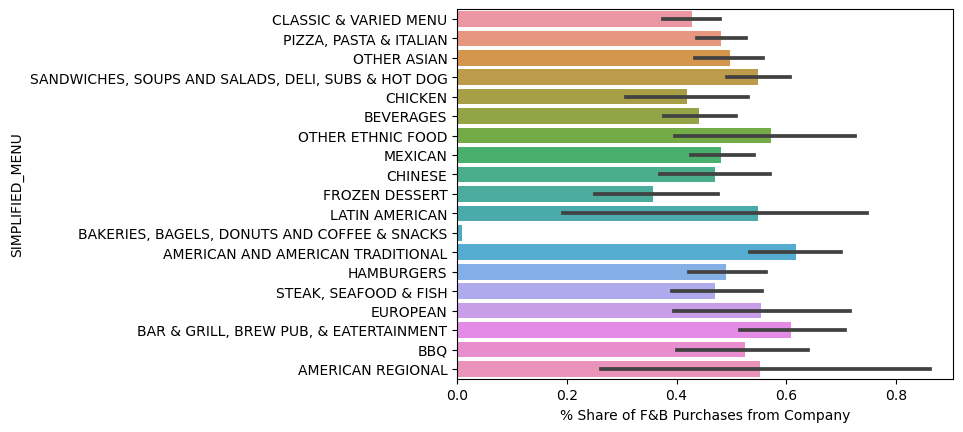

In [64]:
#Which Menu Style Restaurant has most % of F&B Share
sns.barplot(y = df.SIMPLIFIED_MENU, x = df['% Share of F&B Purchases from Company'])

We can see that 1st - (American and American Traditional), 2nd - (BAR & GRILL, BREW PUB, & EATERTAINMENT) , 
3rd (Other ethnic foods)
are those restaurants(Menu-Style) having most %share of F&B purchases

In [65]:
am_am = df[df.SIMPLIFIED_MENU == "AMERICAN AND AMERICAN TRADITIONAL"]
am_am["% Share of F&B Purchases from Company"].sum()

22.857019189412007

TOtal % share of F&B Purchases from Company - For AMERICAN AND AMERICAN TRADITIONAL = 22.857019189412007

In [66]:
bar_ent = df[df.SIMPLIFIED_MENU == "BAR & GRILL, BREW PUB, & EATERTAINMENT"]
bar_ent["% Share of F&B Purchases from Company"].sum()

12.763998314533591

TOtal % share of F&B Purchases from Company - For BAR & GRILL, BREW PUB, & EATERTAINMENT = 12.763998314533591

In [67]:
et_am = df[df.SIMPLIFIED_MENU == "OTHER ETHNIC FOOD"]
et_am["% Share of F&B Purchases from Company"].sum()

5.144706661978111

TOtal % share of F&B Purchases from Company - For ethnic foods = 5.144706661978111

# Conclusion to sheet 1
# Therefore, we can notice that restaurants with menu style - 
1 - AMERICAN AND AMERICAN TRADITIONAL

2 - BAR & GRILL, BREW PUB, & EATERTAINMENT

3 - OTHER ETHNIC FOOD

have the most % share of F&B Purchases from shaun's company

Hence, we get the insight that these category restaurants must be approched so as to get Maximum percent of share in there purchases

# Now , Data visualisation using BI Tools would give better understanding to the Clients

The biggest opportunities can be found in these type of (menu style) restaurants in Non-Commercial establishments as well as Retail Outlets

In [68]:
#Exporting new sheet 1
df.to_excel('Sheet_1.xlsx')

# Sheet 2 - Data Cleaning and EDA

In [69]:
cd D:\Bepec\Project 2 - Food Service

D:\Bepec\Project 2 - Food Service


In [70]:
df2 = pd.read_excel("Food_services.docx-EmbeddedFile.xlsx", "Non Commercial" )

In [71]:
df2.head(2)

,NAME,ADDRESS,CITY,STATE,ZIP,ZIP_PLUS4,COUNTY_CODE,COUNTY_NAME,MSA,MARKET_SEGMENT,...,ENROLLMENT_RANGE,CAPACITY_BEDS_RANGE,NUMBER_OF_SCHOOLS_RANGE,OPERATION_TYPE,OWNERSHIP_TYPE,NUMBER_OF_MEALS_PER_DAY_RANGE,AVERAGE_DAILY_CENSUS,PRIMARY_GPO,SECONDARY_GPO,TOTAL_PATIENT_DAYS
0,HERITAGE HALL NORTH NURSING HOME,55 COOPER ST,AGAWAM,MA,1001,2149.0,25013,HAMPDEN,1122.0,NURSING HOME,...,NOT APPLICABLE,101 TO 500,NOT APPLICABLE,UNCODED,PUBLIC,>2000,120.0,NaN,NaN,NaN
1,AGAWAM COUNCIL ON AGING SENIOR CENTER,68 MEADOWBROOK MNR,AGAWAM,MA,1001,3126.0,25013,HAMPDEN,1122.0,"SOCIAL AND PRIVATE CLUBS, LEGIONS, FRATERNITIES",...,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,UNCODED,UNCODED,51 TO 100,NaN,NaN,NaN,NaN


In [72]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   NAME                           1000 non-null   object 
 1   ADDRESS                        1000 non-null   object 
 2   CITY                           1000 non-null   object 
 3   STATE                          1000 non-null   object 
 4   ZIP                            1000 non-null   int64  
 5   ZIP_PLUS4                      996 non-null    float64
 6   COUNTY_CODE                    1000 non-null   int64  
 7   COUNTY_NAME                    1000 non-null   object 
 8   MSA                            972 non-null    float64
 9   MARKET_SEGMENT                 1000 non-null   object 
 10  EMPLOYEES_NON_COMMERCIAL       1000 non-null   object 
 11  ENROLLMENT_RANGE               1000 non-null   object 
 12  CAPACITY_BEDS_RANGE            1000 non-null   ob

In [73]:
# Dropping columns having large amount of null values or UNCODED Values
# Lets drop MSA column and Zipplus4 too (No Use)
del df2["AVERAGE_DAILY_CENSUS"]
del df2["PRIMARY_GPO"]
del df2["SECONDARY_GPO"]
del df2["TOTAL_PATIENT_DAYS"]
del df2["MSA"]
del df2["ZIP_PLUS4"]
del df2["CAPACITY_BEDS_RANGE"]
del df2["NUMBER_OF_SCHOOLS_RANGE"]
del df2["OPERATION_TYPE"]
del df2["OWNERSHIP_TYPE"]

In [74]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   NAME                           1000 non-null   object
 1   ADDRESS                        1000 non-null   object
 2   CITY                           1000 non-null   object
 3   STATE                          1000 non-null   object
 4   ZIP                            1000 non-null   int64 
 5   COUNTY_CODE                    1000 non-null   int64 
 6   COUNTY_NAME                    1000 non-null   object
 7   MARKET_SEGMENT                 1000 non-null   object
 8   EMPLOYEES_NON_COMMERCIAL       1000 non-null   object
 9   ENROLLMENT_RANGE               1000 non-null   object
 10  NUMBER_OF_MEALS_PER_DAY_RANGE  1000 non-null   object
dtypes: int64(2), object(9)
memory usage: 86.1+ KB


In [75]:
# The dataset contains non commercial data of MA (Massachusetts) State only.
df2.STATE.unique()

array(['MA'], dtype=object)

In [76]:
# The employee count column have Uncoded values too
df2.EMPLOYEES_NON_COMMERCIAL.unique()

array(['UNCODED', '251-500', '1000+', '1-250', '751-999', '501-750'],
      dtype=object)

In [77]:
# as most of the rows contain UNCODED values, hence no replacement can be done
# hence it is better to leave the data for employee count as it is and delete it 
# and should avoid analysis using this column
df2[df2.EMPLOYEES_NON_COMMERCIAL == 'UNCODED'].shape
del df2["EMPLOYEES_NON_COMMERCIAL"]

In [78]:
# as most of the rows contain NOT APPLICABLE values, hence no replacement can be done
# hence it is better to leave the data for ENROLLMENT_RANGE as it is and delete it
# and should avoid analysis using this column
df2.ENROLLMENT_RANGE.value_counts()

NOT APPLICABLE    672
UNCODED            98
2001 TO 5000       69
1001 TO 2000       46
251 TO 500         38
501 TO 1000        32
OVER 5000          31
250 AND LESS       14
Name: ENROLLMENT_RANGE, dtype: int64

In [79]:
del df2["ENROLLMENT_RANGE"]

In [80]:
# NUMBER_OF_MEALS_PER_DAY_RANGE column can help us identify the requirement of F&B Purchases from the company
df2.NUMBER_OF_MEALS_PER_DAY_RANGE.unique()

array(['>2000', '51 TO 100', '1001 TO 2000', '251 TO 500', '501 TO 1000',
       '101 TO 250'], dtype=object)

In [81]:
# NUMBER_OF_MEALS_PER_DAY_RANGE Column value are replaced using self label encoding for better analysis
df2.NUMBER_OF_MEALS_PER_DAY_RANGE=df2.NUMBER_OF_MEALS_PER_DAY_RANGE.replace('51 TO 100', 50)
df2.NUMBER_OF_MEALS_PER_DAY_RANGE=df2.NUMBER_OF_MEALS_PER_DAY_RANGE.replace('101 TO 250', 100)
df2.NUMBER_OF_MEALS_PER_DAY_RANGE=df2.NUMBER_OF_MEALS_PER_DAY_RANGE.replace('251 TO 500', 250)
df2.NUMBER_OF_MEALS_PER_DAY_RANGE=df2.NUMBER_OF_MEALS_PER_DAY_RANGE.replace('501 TO 1000', 500)
df2.NUMBER_OF_MEALS_PER_DAY_RANGE=df2.NUMBER_OF_MEALS_PER_DAY_RANGE.replace('1001 TO 2000', 1000)
df2.NUMBER_OF_MEALS_PER_DAY_RANGE=df2.NUMBER_OF_MEALS_PER_DAY_RANGE.replace('>2000', 2000)
df2.NUMBER_OF_MEALS_PER_DAY_RANGE.unique()

array([2000,   50, 1000,  250,  500,  100], dtype=int64)

In [82]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   NAME                           1000 non-null   object
 1   ADDRESS                        1000 non-null   object
 2   CITY                           1000 non-null   object
 3   STATE                          1000 non-null   object
 4   ZIP                            1000 non-null   int64 
 5   COUNTY_CODE                    1000 non-null   int64 
 6   COUNTY_NAME                    1000 non-null   object
 7   MARKET_SEGMENT                 1000 non-null   object
 8   NUMBER_OF_MEALS_PER_DAY_RANGE  1000 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


# Statistical Findings and Questions based from dataset

1 Which city consumes the maximum number of meals per day?

In [83]:
df2.NUMBER_OF_MEALS_PER_DAY_RANGE.value_counts()

50      325
2000    306
500     177
1000    127
250      43
100      22
Name: NUMBER_OF_MEALS_PER_DAY_RANGE, dtype: int64

In [84]:
# Top City with more than 2000 meals per day
# 1st - WORCESTER
# 2nd - BOSTON
df2.CITY[df2.NUMBER_OF_MEALS_PER_DAY_RANGE == 2000].value_counts()

WORCESTER           23
BOSTON              13
SPRINGFIELD          8
FRAMINGHAM           8
HOLYOKE              8
                    ..
CONWAY               1
WEBSTER              1
SWAMPSCOTT           1
WEST STOCKBRIDGE     1
AGAWAM               1
Name: CITY, Length: 128, dtype: int64

In [85]:
# Top City with more than 1000 meals per day
# 1st - WORCESTER
# 2nd - Westfield
df2.CITY[df2.NUMBER_OF_MEALS_PER_DAY_RANGE == 1000].value_counts()

WORCESTER    6
WESTFIELD    6
BOSTON       6
METHUEN      3
LOWELL       3
            ..
LUNENBURG    1
HARVARD      1
GROTON       1
GARDNER      1
AMHERST      1
Name: CITY, Length: 87, dtype: int64

In [86]:
# Top City with more than 500 meals per day
# 1st - Boston
# 2nd - Worchester
df2.CITY[df2.NUMBER_OF_MEALS_PER_DAY_RANGE == 500].value_counts()

BOSTON           14
WORCESTER         7
LYNN              6
SPRINGFIELD       6
LAWRENCE          6
                 ..
NORTH READING     1
AUBURN            1
PEPPERELL         1
GARDNER           1
DORCHESTER        1
Name: CITY, Length: 87, dtype: int64

In [87]:
# Top City with more than 250 meals per day
# 1st - WORCESTER
# 2nd - BOSTON
df2.CITY[df2.NUMBER_OF_MEALS_PER_DAY_RANGE == 250].value_counts()

WORCESTER           5
BOSTON              4
CHICOPEE            3
NORWOOD             2
HATHORNE            2
BEVERLY             2
ANDOVER             2
SPRINGFIELD         1
WOBURN              1
WESTWOOD            1
MARSHFIELD          1
SOUTH HAMILTON      1
MERRIMAC            1
LOWELL              1
METHUEN             1
LAWRENCE            1
SHERBORN            1
GREAT BARRINGTON    1
LEEDS               1
NORTHAMPTON         1
WESTBOROUGH         1
SHREWSBURY          1
LEICESTER           1
LITTLETON           1
GARDNER             1
FITCHBURG           1
ATHOL               1
WILLIAMSTOWN        1
NORTH ADAMS         1
HUDSON              1
Name: CITY, dtype: int64

In [88]:
# Top City with more than 100 meals per day
# 1st - WORCESTER
# 2nd - Pittsfield
df2.CITY[df2.NUMBER_OF_MEALS_PER_DAY_RANGE == 100].value_counts()

WORCESTER          2
PITTSFIELD         1
LOWELL             1
BOSTON             1
WESTWOOD           1
NORWOOD            1
HINGHAM            1
GLOUCESTER         1
DANVERS            1
SWAMPSCOTT         1
WAKEFIELD          1
METHUEN            1
NEW MARLBOROUGH    1
CHELMSFORD         1
BURLINGTON         1
FRAMINGHAM         1
SPENCER            1
PETERSHAM          1
CONWAY             1
CHARLEMONT         1
DORCHESTER         1
Name: CITY, dtype: int64

In [89]:
# Top City with more than 50 meals per day
# 1st - Boston
# 2nd - Springfield
df2.CITY[df2.NUMBER_OF_MEALS_PER_DAY_RANGE == 50].value_counts()

BOSTON         29
SPRINGFIELD    19
WORCESTER      17
LAWRENCE       12
PITTSFIELD     11
               ..
WINCHENDON      1
TOWNSEND        1
PEPPERELL       1
LUNENBURG       1
SUTTON          1
Name: CITY, Length: 152, dtype: int64

From the above results we can see that (Worcester City), was among the top cities with most no of meals per day

In [90]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   NAME                           1000 non-null   object
 1   ADDRESS                        1000 non-null   object
 2   CITY                           1000 non-null   object
 3   STATE                          1000 non-null   object
 4   ZIP                            1000 non-null   int64 
 5   COUNTY_CODE                    1000 non-null   int64 
 6   COUNTY_NAME                    1000 non-null   object
 7   MARKET_SEGMENT                 1000 non-null   object
 8   NUMBER_OF_MEALS_PER_DAY_RANGE  1000 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


2 - Which Market Segment was among the top consumer of (Meals per day) in WORCESTER City?

In [91]:
df2.MARKET_SEGMENT[df2.CITY == "WORCESTER"].value_counts()

NURSING HOME                                                 15
OTHER HEALTHCARE ESTABLISHMENTS                              12
4 YEAR COLLEGE & UNIVERSITIES                                 6
PRIMARY SCHOOL                                                6
HOSPITALS                                                     6
CENTERS FOR REHABILITATION AND READAPTION, ADULT DAY CARE     6
PRE-K, KINDERGARTEN, CHILD CARE                               2
SECONDARY SCHOOL                                              2
ASSISTED LIVING                                               2
2 YEAR COLLEGE & UNIVERSITIES                                 2
SCHOOL DISTRICTS                                              1
Name: MARKET_SEGMENT, dtype: int64

1st - NURSING HOME 

2nd - OTHER HEALTHCARE ESTABLISHMENTS

In [92]:
# The code output shows that 2000 meals per day consumed from 129 Nursing-Home segment
# and 1000 meals per day from 61 Nursing home segment
df2.NUMBER_OF_MEALS_PER_DAY_RANGE[df2.MARKET_SEGMENT == "NURSING HOME"].value_counts()

2000    129
1000     61
500      31
Name: NUMBER_OF_MEALS_PER_DAY_RANGE, dtype: int64

This confirms that Nursing Homes consumes maximum amount of Meals per day

In [93]:
df2.CITY[df2.MARKET_SEGMENT == "NURSING HOME"].value_counts()

WORCESTER          15
HOLYOKE             8
FRAMINGHAM          7
HAVERHILL           7
LOWELL              6
                   ..
TEWKSBURY           1
SHELBURNE FALLS     1
WESTFORD            1
ATHOL               1
AGAWAM              1
Name: CITY, Length: 107, dtype: int64

In [94]:
# storing all Worcester City data in a Variable named (wr)
wr = df2[df2.CITY=="WORCESTER"]

In [95]:
# Storing all Nursing home in Worcestor City in a variable named(wr_nh)
wr[df2.MARKET_SEGMENT == "NURSING HOME"].reset_index()
wr_nh=wr[df2.MARKET_SEGMENT == "NURSING HOME"].reset_index()

C:\Users\Dell\AppData\Local\Temp\ipykernel_13636\3701700442.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wr[df2.MARKET_SEGMENT == "NURSING HOME"].reset_index()
C:\Users\Dell\AppData\Local\Temp\ipykernel_13636\3701700442.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wr_nh=wr[df2.MARKET_SEGMENT == "NURSING HOME"].reset_index()


3 - What is the total no of Meals per day in Worcestor City consumed by Nursing homes?

answer  = Greater than 24500

In [96]:
# This shows the total no of Meals per day in WOrcestor City consumed by Nursing homes are greater than 24500
wr_nh.NUMBER_OF_MEALS_PER_DAY_RANGE.sum()

24500

Therefore, we have the adjacent opportunities from the non-commercial establishments to additionally sell into (Nursing Home) Market Segments in the city of WORCESTER and rest other cities too

4 - Which County consumes the most no of meals per day?

<AxesSubplot:xlabel='COUNTY_NAME', ylabel='NUMBER_OF_MEALS_PER_DAY_RANGE'>

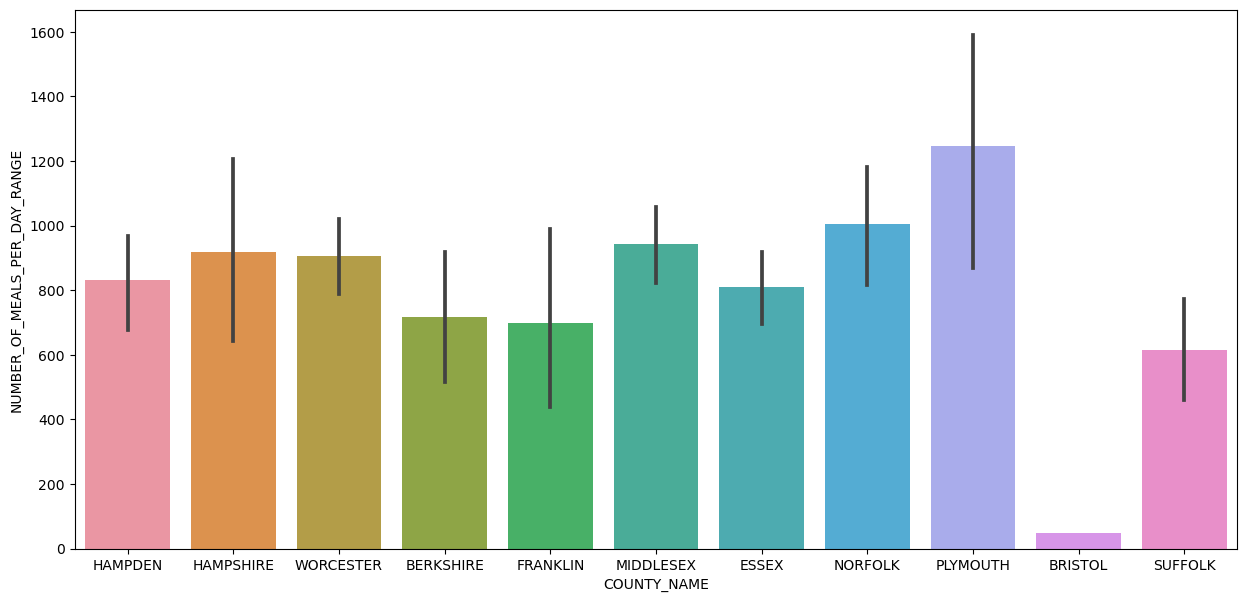

In [97]:
plt.pyplot.figure(figsize = (15,7))
sns.barplot(x = df2.COUNTY_NAME, y= df2.NUMBER_OF_MEALS_PER_DAY_RANGE)

In [98]:
pl = df2[df2.COUNTY_NAME == "PLYMOUTH"]
pl.NUMBER_OF_MEALS_PER_DAY_RANGE.sum()

22450

From the above chart, Plymouth County consumes most no of meals greater than 22450 per day

In [99]:
df2.to_excel('Sheet_2.xlsx')

# Conclusion to Sheet 2:
1 - we have the adjacent opportunities from the non-commercial establishments to additionally sell into (Nursing Home) Market Segments in the city of WORCESTER and rest other cities too

2 - Plymouth County consumes most no of meals greater than 22450 per day

# # Sheet 3 - Data Cleaning and EDA

In [100]:
df3 = pd.read_excel("Food_services.docx-EmbeddedFile.xlsx", "Retail Stores" )

In [101]:
df3.head(3)

,NAME,CITY,STATE,ZIP,ZIP_PLUS4,COUNTY_CODE,COUNTY_NAME,MSA,market_segment2,units,EMPLOYEES,years_in_business,annual_sales
0,AZON LIQUORS,AGAWAM,MA,1001,1530.0,25013.0,HAMPDEN,1122.0,LIQUOR STORES,INDEPENDENT (1-9 UNITS),1 TO 4,UNCODED / DATA CURRENTLY UNAVAILABLE,"$500,001 - $1,000,000"
1,CUSTOM WINE ONLINE LLC,COVINGTON,KY,41011,2487.0,21117.0,KENTON,1642.0,LIQUOR STORES,INDEPENDENT (1-9 UNITS),1 TO 4,UNCODED / DATA CURRENTLY UNAVAILABLE,"$2,500,001 - $5,000,000"
2,BP,COVINGTON,KY,41011,1441.0,21117.0,KENTON,1642.0,GAS STATIONS,501+ UNITS,5 TO 9,UNCODED / DATA CURRENTLY UNAVAILABLE,UNCODED


In [102]:
# deleting unnecessary columns from the database:
del df3["ZIP_PLUS4"]
del df3["MSA"]
del df3["years_in_business"]

In [103]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             1001 non-null   object 
 1   CITY             1001 non-null   object 
 2   STATE            1001 non-null   object 
 3   ZIP              1001 non-null   int64  
 4   COUNTY_CODE      974 non-null    float64
 5   COUNTY_NAME      974 non-null    object 
 6   market_segment2  1001 non-null   object 
 7   units            1001 non-null   object 
 8   EMPLOYEES        1001 non-null   object 
 9   annual_sales     1001 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 78.3+ KB


In [104]:
df3.units.value_counts()

INDEPENDENT (1-9 UNITS)    828
501+ UNITS                 101
101-250 UNITS               55
251-500 UNITS                9
51-100 UNITS                 8
Name: units, dtype: int64

In [105]:
#Replacing the UNITS values: with the minimum value from the range for analysis
df3['units'] = df3['units'].replace("INDEPENDENT (1-9 UNITS)", 1)
df3['units'] = df3['units'].replace("51-100 UNITS", 51)
df3['units'] = df3['units'].replace("101-250 UNITS", 101)
df3['units'] = df3['units'].replace("251-500 UNITS", 251)
df3['units'] = df3['units'].replace("501+ UNITS", 501 )

In [106]:
# Found 1 unknown value, 
df3.EMPLOYEES.value_counts()

1 TO 4      564
5 TO 9      148
10 TO 19    142
20 TO 49    110
OVER 50      36
UNKNOWN       1
Name: EMPLOYEES, dtype: int64

In [107]:
df3.head(3)

,NAME,CITY,STATE,ZIP,COUNTY_CODE,COUNTY_NAME,market_segment2,units,EMPLOYEES,annual_sales
0,AZON LIQUORS,AGAWAM,MA,1001,25013.0,HAMPDEN,LIQUOR STORES,1,1 TO 4,"$500,001 - $1,000,000"
1,CUSTOM WINE ONLINE LLC,COVINGTON,KY,41011,21117.0,KENTON,LIQUOR STORES,1,1 TO 4,"$2,500,001 - $5,000,000"
2,BP,COVINGTON,KY,41011,21117.0,KENTON,GAS STATIONS,501,5 TO 9,UNCODED


In [108]:
# we can see that the annual sales for unknown employee row is uncoded, hence deleting the row.
df3[df3["EMPLOYEES"] == "UNKNOWN"]

,NAME,CITY,STATE,ZIP,COUNTY_CODE,COUNTY_NAME,market_segment2,units,EMPLOYEES,annual_sales
56,K VA T FOOD STORES INC,LOUISA,KY,41230,21127.0,LAWRENCE,GROCERY STORES (LIMITED CHANNEL DISTRIBUTOR),1,UNKNOWN,UNCODED


In [109]:
#replacing Unknown with np.nan and droping the row.
df3["EMPLOYEES"] = df3["EMPLOYEES"].replace("UNKNOWN", np.nan)
df3["EMPLOYEES"] = df3["EMPLOYEES"].dropna(axis = 0)

In [110]:
df3.EMPLOYEES.value_counts()

1 TO 4      564
5 TO 9      148
10 TO 19    142
20 TO 49    110
OVER 50      36
Name: EMPLOYEES, dtype: int64

In [111]:
df3.isna().sum()

NAME                0
CITY                0
STATE               0
ZIP                 0
COUNTY_CODE        27
COUNTY_NAME        27
market_segment2     0
units               0
EMPLOYEES           1
annual_sales        0
dtype: int64

In [112]:
# droping null values
df3['EMPLOYEES'] = df3['EMPLOYEES'].dropna()

In [113]:
df3.isna().sum()

NAME                0
CITY                0
STATE               0
ZIP                 0
COUNTY_CODE        27
COUNTY_NAME        27
market_segment2     0
units               0
EMPLOYEES           1
annual_sales        0
dtype: int64

In [114]:
df3 = df3.dropna(axis = 0)

In [115]:
df3.shape

(973, 10)

In [116]:
# as the annual sales have uncoded value, hence deleting the rows is the best idea for analysis
df3.annual_sales.value_counts()
df3["annual_sales"] = df3["annual_sales"].replace("UNCODED", np.nan)

In [117]:
df3.isna().sum()

NAME                 0
CITY                 0
STATE                0
ZIP                  0
COUNTY_CODE          0
COUNTY_NAME          0
market_segment2      0
units                0
EMPLOYEES            0
annual_sales       212
dtype: int64

In [118]:
df3 = df3.dropna(axis = 0)

In [119]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             761 non-null    object 
 1   CITY             761 non-null    object 
 2   STATE            761 non-null    object 
 3   ZIP              761 non-null    int64  
 4   COUNTY_CODE      761 non-null    float64
 5   COUNTY_NAME      761 non-null    object 
 6   market_segment2  761 non-null    object 
 7   units            761 non-null    int64  
 8   EMPLOYEES        761 non-null    object 
 9   annual_sales     761 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 65.4+ KB


In [120]:
df3.EMPLOYEES.unique()

array(['1 TO 4', '10 TO 19', 'OVER 50', '5 TO 9', '20 TO 49'],
      dtype=object)

In [121]:
# replacing employee row value by self labeling
df3.EMPLOYEES = df3["EMPLOYEES"].replace('1 TO 4', 1)
df3.EMPLOYEES = df3["EMPLOYEES"].replace('5 TO 9', 5)
df3.EMPLOYEES = df3["EMPLOYEES"].replace('10 TO 19', 10)
df3.EMPLOYEES = df3["EMPLOYEES"].replace('20 TO 49', 20)
df3.EMPLOYEES = df3["EMPLOYEES"].replace('OVER 50', 50)

In [122]:
df3.EMPLOYEES.unique()

array([ 1, 10, 50,  5, 20], dtype=int64)

In [123]:
df3.annual_sales.unique()

array(['$500,001 - $1,000,000', '$2,500,001 - $5,000,000', '<=$500,000',
       '$1,000,001 - $2,500,000', '>$5,000,000'], dtype=object)

In [124]:
# replacing annual sales values by self encoding
df3.annual_sales = df3.annual_sales.replace('<=$500,000', 0)
df3.annual_sales = df3.annual_sales.replace('$500,001 - $1,000,000', 1)
df3.annual_sales = df3.annual_sales.replace('$1,000,001 - $2,500,000', 2)
df3.annual_sales = df3.annual_sales.replace('$2,500,001 - $5,000,000', 3)
df3.annual_sales = df3.annual_sales.replace('>$5,000,000', 4)

In [125]:
df3.annual_sales.unique()

array([1, 3, 0, 2, 4], dtype=int64)

# Statistical Findings and Questions based from dataset Sheet - 3

In [126]:
df3.market_segment2.value_counts()

GROCERY STORES (LIMITED CHANNEL DISTRIBUTOR)    383
LIQUOR STORES                                   132
CONVENIENCE STORES                              121
OTHER FOOD SPECIALIST RETAILERS                  35
FRUIT AND VEGETABLE MARKETS                      25
MEAT MARKET                                      24
GAS STATIONS                                     21
CONFECTIONERS                                    14
FISH & SEAFOOD MARKET                             6
Name: market_segment2, dtype: int64

1 - Which market segment has the most amount of annual sales?

<AxesSubplot:xlabel='annual_sales', ylabel='market_segment2'>

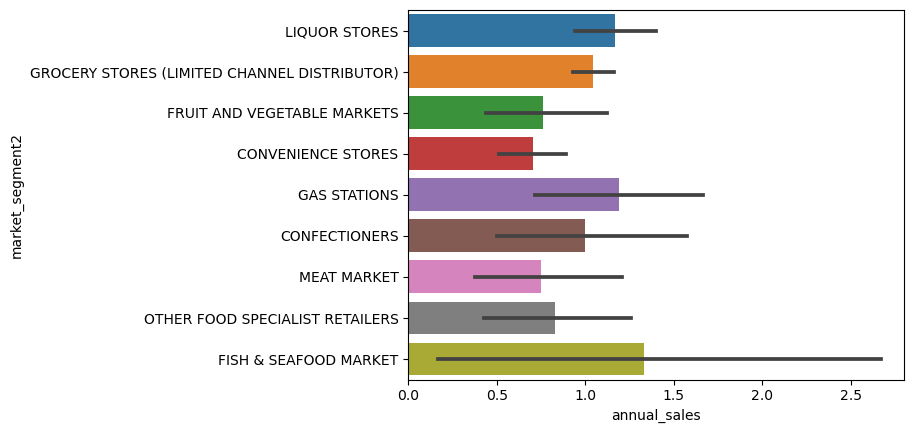

In [127]:
sns.barplot(y = df3.market_segment2, x = df3.annual_sales)

We can see from the chart that:

1 - Fish&Seafood Market has the maximum annual sales

2 - Gas Stations are on the 2nd for maximum sales

In [128]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             761 non-null    object 
 1   CITY             761 non-null    object 
 2   STATE            761 non-null    object 
 3   ZIP              761 non-null    int64  
 4   COUNTY_CODE      761 non-null    float64
 5   COUNTY_NAME      761 non-null    object 
 6   market_segment2  761 non-null    object 
 7   units            761 non-null    int64  
 8   EMPLOYEES        761 non-null    int64  
 9   annual_sales     761 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 65.4+ KB


2 - Which states has most annual sales?

<AxesSubplot:xlabel='STATE', ylabel='annual_sales'>

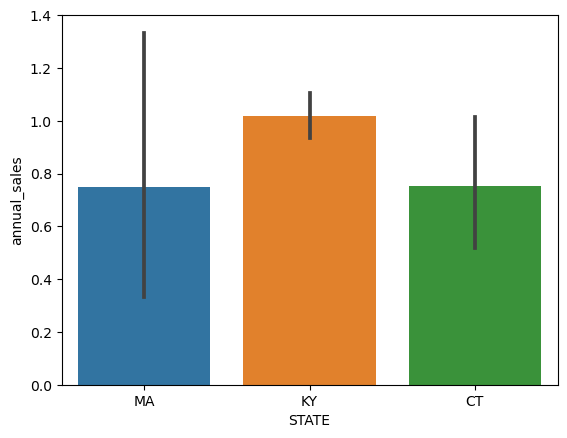

In [131]:
sns.barplot(x = df3.STATE, y = df3.annual_sales)

We can see from the chart that Kentucky state, has most amount of annual sales.

# Conclusion to Sheet 3 EDA :
1 - Biggest opportunities in Retail Outlets are in Kentucky State.

2 - Fish&Seafood Market Segment as well as different Gas stations must be our hit.


In [130]:
df3.to_excel('Sheet_3.xlsx')